# Linear Correlation and Regression

## Linear Correlation

Finding the correlation, $\rho$, between two different quantities.

Given two datasets, $X$ and $Y$, we can mathematically find their correlation

$ \rho = \frac{ cor(X,Y) }{ \sigma_X \sigma_Y } = \frac{ \sum (X_i-\bar{X})(Y_i-\bar{Y}) }{ \sqrt{ \sum (X_i-\bar{X})^2 \sum(Y_i-\bar{Y})^2 }  } $

We will be using built-in functions instead of the above equation.

#### Note: This is only for linear correlation.

If $\rho = 0$, this implies no linear correlation (no linear relationship).

If $0 < \rho \le 1 $, this implies positive correlation (positive slope).

If $-1 \le \rho < 0 $, this implies negative correlation (negative slope).

Strong cases:

If $\rho \approx 1 $, this implies strong positive correlation (both $X$ and $Y$ change in exactly the same way).

If $\rho \approx -1 $, this implies strong negative correlation ($X$ and $Y$ change in exactly opposite ways).



## Regression

Fitting a function to dataset.

### Linear Regression

Fitting the equation of a line to a dataset.

Purpose: Summarize the data using a function.

Goal: Find the equation of the line:

$y = mx+b$

$m$: slope

$b$: y-intercept

Use a function from the stats library:

stats.linregress( dataset1 , dataset2 )

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#NEW LIBRARY
#STATISTICAL FUNCTIONS
import scipy.stats as stats

## Correlation between women's head size and brain weight

$X$: Womens head size [$cm^3$]

$Y$: Womens brain weight [$g$]

Total number of participant is 103.

In [ ]:
#IMPORT DATA
#pd.read_csv

brain_head = pd.read_csv( 'brainhead.csv' )
brain_head

,Head Size,Brain Weight
0,2857,1027
1,3436,1235
2,3791,1260
3,3302,1165
4,3104,1080
...,...,...
98,3214,1110
99,3394,1215
100,3233,1104
101,3352,1170


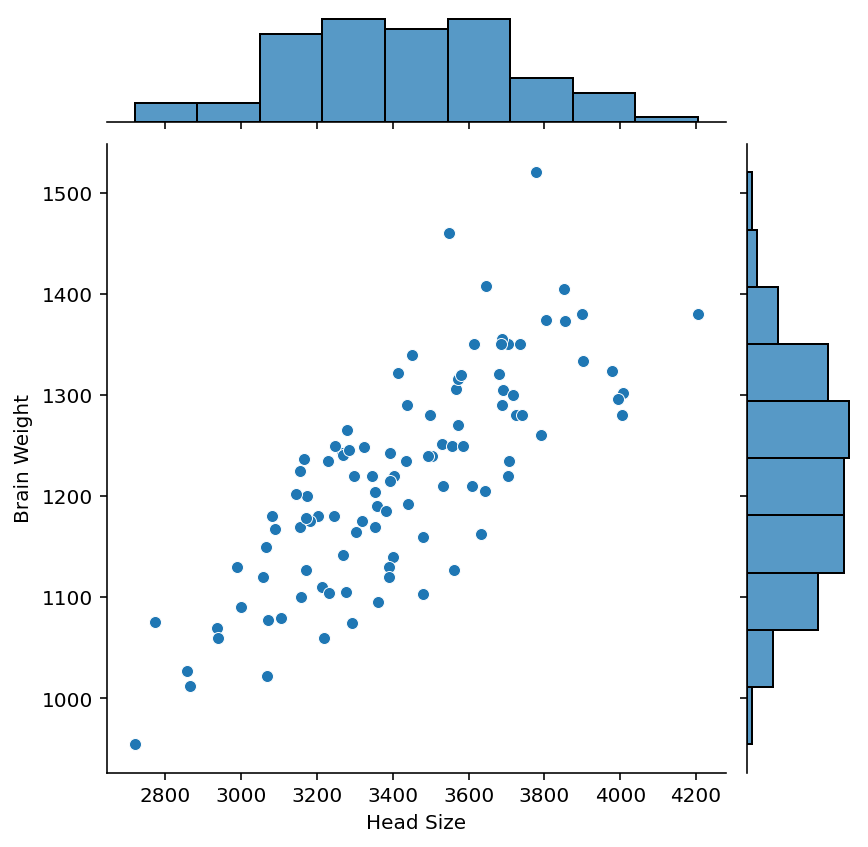

In [ ]:
#LINEAR CORRELATION
#PLOT DATA
#USE THE sns.jointplot()
#1st condintion: Is the data changing linearly?
#2nd condintion: Is each indiviual dataset is bell-shaped?
#3rd condintion: Is the data homoscedastic?

#EXTRACT THE COLUMNS OF THE ORIGINAL DATAFRAME
X = brain_head[ 'Head Size' ] #1st columns from the dataframe
Y = brain_head[ 'Brain Weight' ] #2nd columns from the dataframe

sns.jointplot( data = brain_head , x = X , y = Y )

###### Condition 1: THE DATA IS (APPROXIMATELY) CHANGING LINEARLY.

###### Condition 2: THE DATASETS DISTRIBUATION IS (APPROXIMATELY) BELL-SHAPE.

###### Condition 3: THE DATA IS (APPROXIMATELY) HOMOSCEDASTIC.

#### CALCULATING A LINEAR CORRELATION COEFFICIENT IS APPROPIATE.

#### SUMMARIZING THE DATA USING A LINE IS APPROPIATE.

In [ ]:
#CALCULATE A LINEAR CORRELATION COEFFICIENT
#stats.linregress()
#INPUTS ARE BOTH THE DATASETS

lin_corr_reg = stats.linregress( X , Y )

#EXTRACT THE SLOPE, Y-INTERCEPT, THE RHO
slope_obs = lin_corr_reg.slope
intercept_obs = lin_corr_reg.intercept
rho_obs = lin_corr_reg.rvalue

print( slope_obs )
print( intercept_obs )
print( rho_obs )

0.27280169736173243
286.087017845948
0.775136752357563


##### Plot the line $y = mx + b$

Create an array of y values which represent

y = 0.27280169736173243 * x + 286.087017845948

Step 1:

**Create an array of x values**

Use the np.linspace( min , max , number of total values  ) function. 

Output: An array of numbers starting at min and stopping at max. 

Step 2:

**Multiple the x array by the slope.**

Step 3:

**Then the previous result by the intercept.**


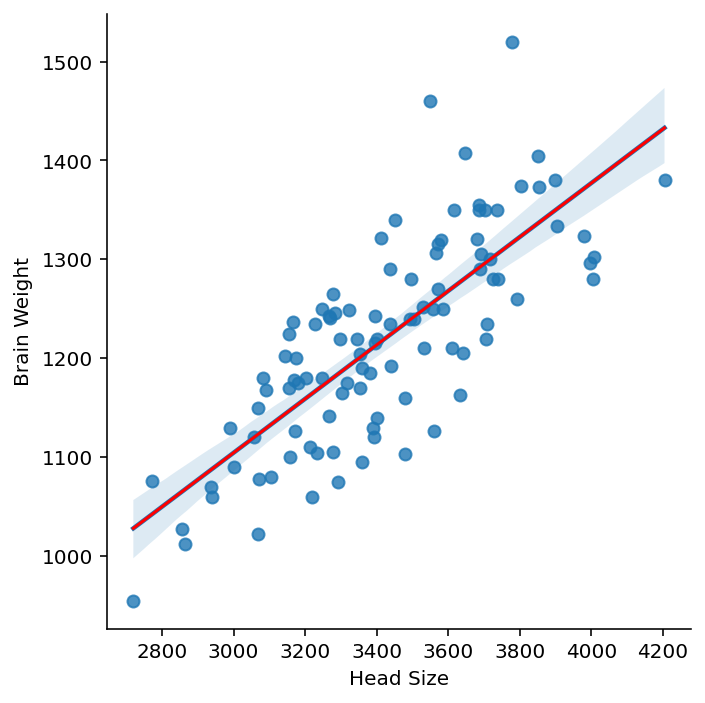

In [ ]:
#CREATE AN ARRAY OF X VALUES
#FIND minimun AND maximum
#sns.lmplot( )
#np.linspace(  )

minX = np.min( X ) #min x value of X
maxX = np.max( X ) #max x value of X

x_arr = np.linspace( minX , maxX , 100 ) #inputs
y_arr = slope_obs * x_arr + intercept_obs #outputs

sns.lmplot( data = brain_head , x = 'Head Size' , y = 'Brain Weight' )
plt.plot( x_arr , y_arr , color = 'red' )

In [ ]:
brain_head

,Head Size,Brain Weight
0,2857,1027
1,3436,1235
2,3791,1260
3,3302,1165
4,3104,1080
...,...,...
98,3214,1110
99,3394,1215
100,3233,1104
101,3352,1170


In [ ]:
rho_obs

0.775136752357563

## NHST analysis for $\rho$

$H_0$: There is no relationship (correlation) between a women's head size and brain weight.

Mathematically: $\rho = 0$

Process: Test the correlation by shuffling (rearranging) the order of one or both datasets.

For every simulation:

1) Take either dataset (or both) and rearrange the order.
2) Check/Calculate the correlation.
3) Store the result.

In [ ]:
#ONE SIMULATION NHST

#REARRANGE X DATA
Xshuffled = X.sample( len( X ) ) #taken without replacement

#CHECK THE CORRELATION
lin_corr = stats.linregress( Xshuffled , Y )
lin_corr.rvalue

0.022453965167062464

0.0

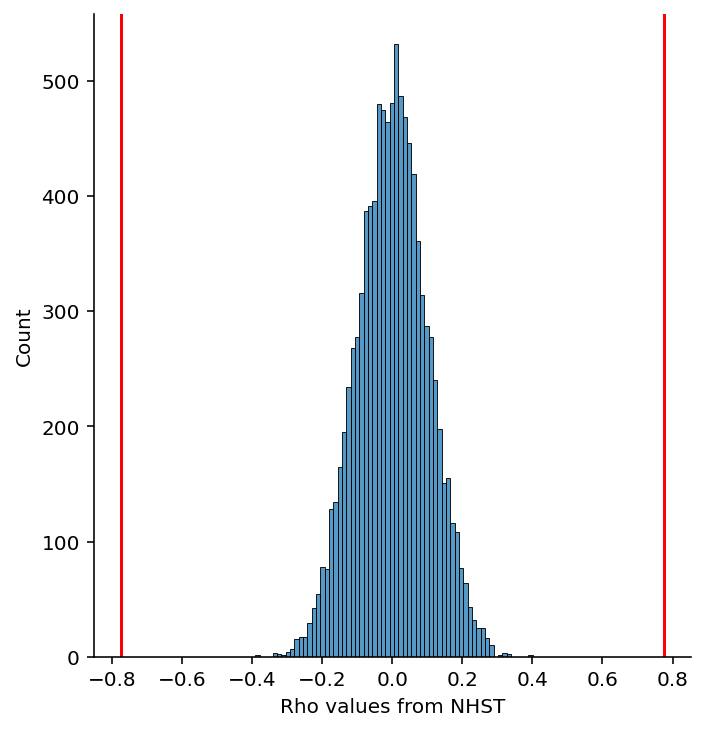

In [ ]:
#MULTIPLE SIMULATIONS
#NHST

simulations = range( 10000 )
rho_arr = np.zeros( 10000 )
for i in simulations:
    #REARRANGE X DATA
    Xshuffled = X.sample( len( X ) ) #taken without replacement

    #CHECK THE CORRELATION
    lin_corr = stats.linregress( Xshuffled , Y )
    resample_rho = lin_corr.rvalue

    #STORE LINEAR CORRELATION COEFFICIENT
    rho_arr[i] = resample_rho
    
#PLOT DISTRIBUTION
p = sns.displot( data = rho_arr )
p.set( xlabel = 'Rho values from NHST' )
plt.axvline( rho_obs , color = 'r' )
plt.axvline( -rho_obs , color = 'r' )

#PVALUE
#FIND ALL THE EXTREME CASES
#LEFT AND RIGHT TAIL
extreme_left = np.sum( rho_arr <= -rho_obs )
extreme_right = np.sum( rho_arr >= rho_obs )
extreme_total = extreme_right + extreme_left
pvalue = extreme_total/len( rho_arr )

pvalue

## CI calculation

Construct a confidence interval around our observed result by resampling pairs from your dataframe.

In [ ]:
#ONE SIMULATION

brain_resample = brain_head.sample( len( brain_head ) , replace = True )
Xresample = brain_resample['Head Size']
Yresample = brain_resample['Brain Weight']
linreg = stats.linregress( Xresample , Yresample )
linreg.rvalue #rho value

0.7910621641191913

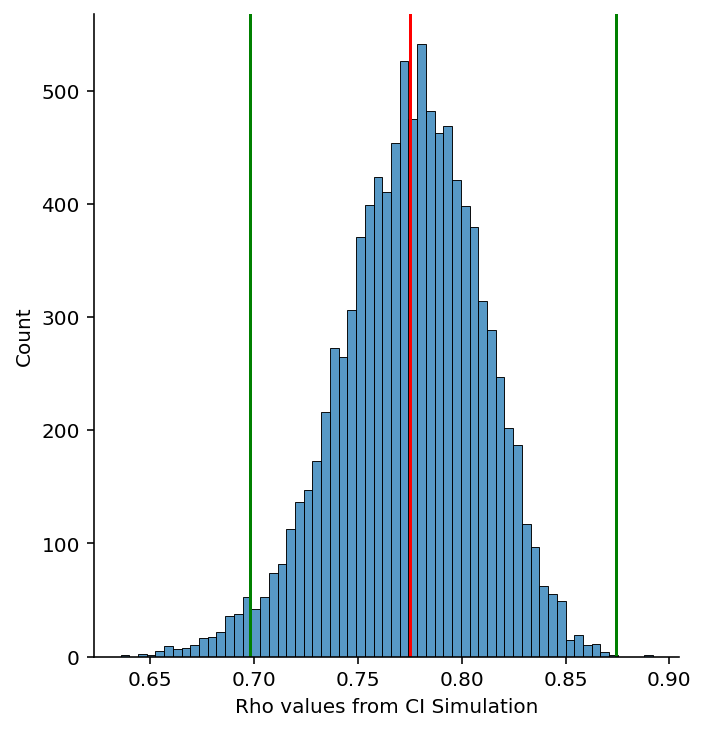

In [ ]:
#MULTIPLE SIMULATIONS
#CI

simulations = range( 10000 )
rho_arr = np.zeros( 10000 )
for i in simulations:
    #RESAMPLE FROM BOTH DATAFRAME
    brain_resample = brain_head.sample( len( brain_head ) , replace = True )
    Xresample = brain_resample['Head Size']
    Yresample = brain_resample['Brain Weight']
    linreg = stats.linregress( Xresample , Yresample )
    resample_rho = linreg.rvalue

    #STORE LINEAR CORRELATION COEFFICIENT
    rho_arr[i] = resample_rho

#CI
rho_sort = sorted( rho_arr )
Mlower = rho_sort[49]
Mupper = rho_sort[9949]
lowerbound = 2 * rho_obs - Mupper
upperbound = 2 * rho_obs - Mlower
#PLOT DISTRIBUTION
p = sns.displot( data = rho_arr )
p.set( xlabel = 'Rho values from CI Simulation' )
plt.axvline( rho_obs , color = 'r' )
plt.axvline( lowerbound , color = 'g' )
plt.axvline( upperbound , color = 'g' )